In [1]:
import sys
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sys.path.insert(0, '/Users/Kwat/binf/cca')
import ccal

%matplotlib inline

==================== Computational Cancer Analysis Library ====================

<15:28:59.564948> Checking dependencies ...
<15:28:59.567073> Using the following packages:
<15:28:59.568832> 	matplotlib (v1.5.1)
<15:28:59.568850> 	numpy (v1.10.4)
<15:28:59.568859> 	pandas (v0.18.0)
<15:28:59.568880> 	rpy2 (v2.7.9)
<15:28:59.568887> 	scikit-learn (v0.17.1)
<15:28:59.568895> 	scipy (v0.17.0)
<15:28:59.568902> 	seaborn (v0.7.0)


# Make test data

In [13]:
nrow = 50
nrow_2 = nrow + 30
ncol = 200
ncol_2 = ncol + 30

row_names = ['feature {}'.format(i) for i in range(nrow)]
row_names_2 = ['feature {}'.format(i) for i in range(nrow_2)]
col_names = ['elemenet {}'.format(i) for i in range(ncol)]
col_names_2 = ['elemenet {}'.format(i) for i in range(ncol_2)]

features = pd.DataFrame(np.random.random((nrow_2, ncol_2)),
                        index=row_names_2,
                        columns=col_names_2)
scores = pd.DataFrame(np.random.rand(nrow), index=row_names, columns=['p-value'])

ref_type = 'categorical'
if ref_type == 'continuous':
    ref = pd.DataFrame(np.random.rand(ncol), index=col_names, columns=['Reference']).T
else:
    if ref_type == 'categorical':
        n_category = 6
    elif ref_type == 'binary':
        n_category = 1
    ref = pd.DataFrame(np.random.random_integers(0, n_category, ncol), index=col_names, columns=['Reference']).T

# Load data

In [21]:
features = ccal.support.read_gct('../../data/test/HNSCC_PATHWAYS.v2.gct')
refs = ccal.support.read_gct('../../data/test/additional_YAP_signatures.gct')

# Make functions

In [22]:
verbose_print = ccal.support.verbose_print
information_coefficient = ccal.information.information_coefficient
establish_path = ccal.support.establish_path

CMAP_CONTINUOUS = ccal.visualize.CMAP_CONTINUOUS
CMAP_CATEGORICAL = ccal.visualize.CMAP_CATEGORICAL
CMAP_BINARY = ccal.visualize.CMAP_BINARY
FONT20_BOLD = ccal.visualize.FONT20_BOLD
FONT16_BOLD = ccal.visualize.FONT16_BOLD
FONT12_BOLD = ccal.visualize.FONT12_BOLD
FONT12 = ccal.visualize.FONT12
BLACK = ccal.visualize.BLACK
ref_type = 'continuous'
output_directory = '../../data/features'

<16:47:39.658306> features vs. siTAZ_DN (1/14) ...
<16:47:39.658513> Using 566 intersecting columns from features and ref, which have 566 and 566 columns respectively ...
<16:47:42.528290> Plotting top 0.95 features vs. ref ...
<16:47:42.528356> Normalizing continuous features and ref ...


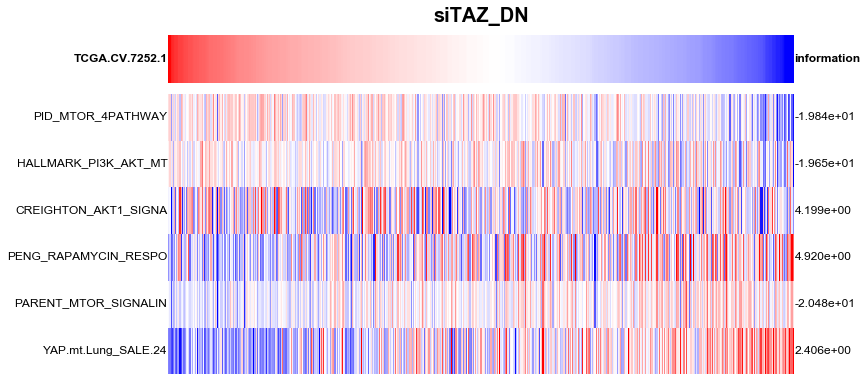

<16:47:48.107462> features vs. siYAP_DN (2/14) ...
<16:47:48.107728> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<16:47:51.150822> Plotting top 0.95 features vs. ref ...
<16:47:51.150883> Normalizing continuous features and ref ...


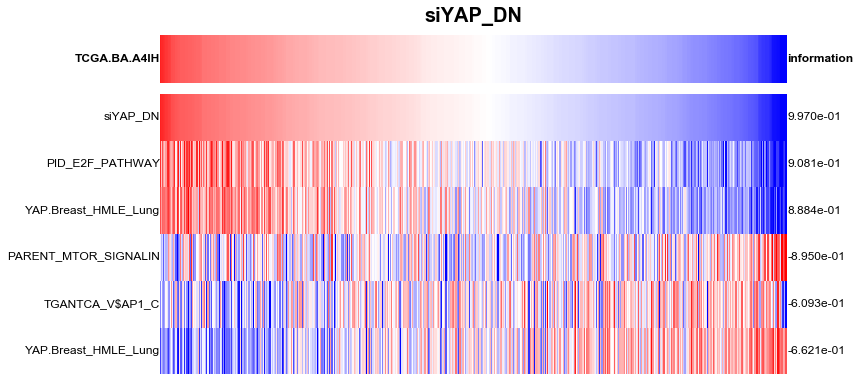

<16:47:57.045894> features vs. siYAP_TAZ_DN (3/14) ...
<16:47:57.046163> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<16:47:59.676494> Plotting top 0.95 features vs. ref ...
<16:47:59.676558> Normalizing continuous features and ref ...


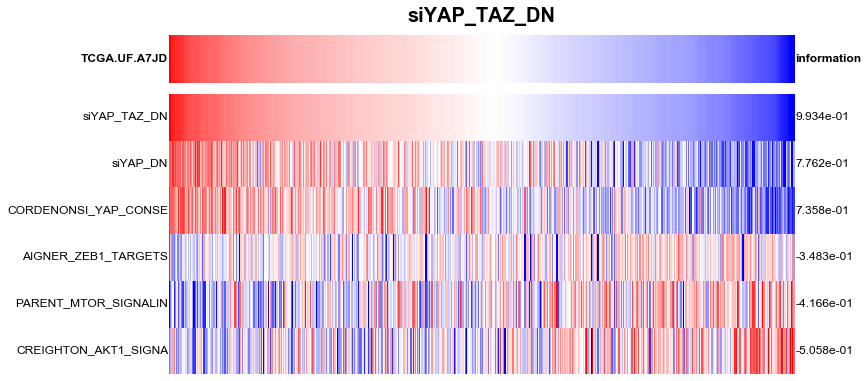

<16:48:05.076725> features vs. Cordenonsi_et_al_2011_YAP_UP (4/14) ...
<16:48:05.076919> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<16:48:07.740507> Plotting top 0.95 features vs. ref ...
<16:48:07.740569> Normalizing continuous features and ref ...


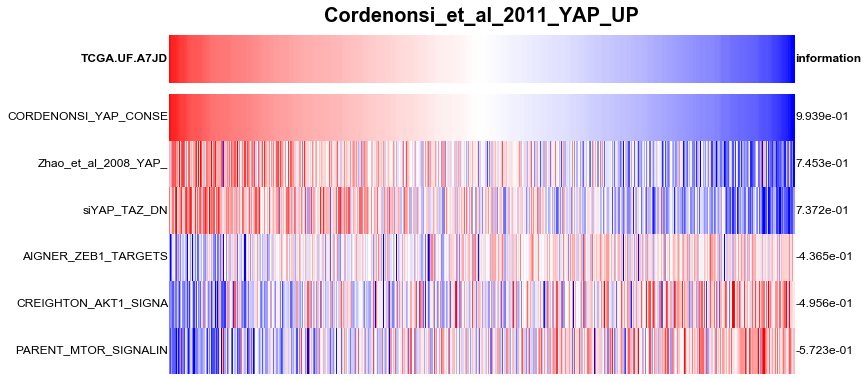

<16:48:13.268466> features vs. GSE10196_YAP1 (5/14) ...
<16:48:13.268704> Using 566 intersecting columns from features and ref, which have 567 and 566 columns respectively ...
<16:48:15.898204> Plotting top 0.95 features vs. ref ...
<16:48:15.898271> Normalizing continuous features and ref ...


KeyboardInterrupt: 

In [97]:
rank_features_against_references(features, refs, 'information', ref_type='continuous', output_directory=output_directory)

# NMF

In [ ]:
nmf_result = ccbal.analyze.nmf(features, [3], plot=True)

In [ ]:
ns, runtimes = ccbal.support.runtime(ccbal.information.information_coefficient, n_range=range(10))

In [ ]:
from scipy.stats import pearsonr
ns, runtimes = ccbal.support.runtime(pearsonr, n_range=range(10))

In [ ]:
# make_heatmap_panel is in the ccba/library/ccba.py
# make_heatmap_panel calls plot_heatmap_panel, which is in the ccba/library/visualize.py
# make_heatmap_panel computes IC of each features's row and the ref (target).
# In the future, we can add other computation within this function so it can compute P-Val and FDR as well.
make_heatmap_panel(features, ref, ['IC', 'P-Val'])

# XXX

In [ ]:
# Feature selection test with real data for IC, CMI diff, and CMI ratio association metrics
## Ranking 60 genes + target profile with respect to the activation profile of KRAS component 6 (BRAF/MAPK)



## Feature selection using Information Coefficient

start_time = time.time()

gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

IC = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    IC[i] = round(compute_information_coefficient(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
IC_order = list(np.argsort(IC, kind='quicksort'))
IC = IC[IC_order]
A_sorted = A.reindex(A.index[IC_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

IC_val = pd.Series(IC[:A.shape[0]], name = "IC")
features = A_sorted.head(A.shape[0])
plot_heatmap_panel_v2(target, features, IC_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")

## Feature selection using CMI diff

start_time = time.time()

gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

CMI_diff_vals = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    CMI_diff_vals[i] = round(CMI_diff(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
CMI_order = list(np.argsort(CMI_diff_vals, kind='quicksort'))
CMI_diff_vals = CMI_diff_vals[CMI_order]
A_sorted = A.reindex(A.index[CMI_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

CMI_val = pd.Series(CMI_diff_vals[:A.shape[0]], name = "CMI diff")
features = A_sorted.head(A.shape[0])
plot_heatmap_panel_v2(target, features, CMI_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")

## Feature selection using CMI ratio

start_time = time.time()


gct1 = read_gct('/Users/tamayo/UCSD_2015/signatures/paper2/analysis/top_hits.gct', fill_na=0)
gct2 = read_gct('/Users/tamayo/UCSD_2015/signatures/Onco-GPS/CCLE_RNAseq_KRAS_SALE_Late.No_HAEM.k_9.H.v1.gct', fill_na=0)

common_cols = list(set(gct1.columns) & set(gct2.columns))
A = gct1[common_cols]
B = gct2[common_cols]
target = pd.DataFrame(B.loc['KRAS_SALE_Late_Comp_C6_9'])
target = target.T

CMI_ratio_vals = np.zeros(A.shape[0])
for i in range(A.shape[0]):
    CMI_ratio_vals[i] = round(CMI_ratio(x=target.iloc[0,:], y=A.iloc[i,:]), 3)  
                
CMI_order = list(np.argsort(CMI_ratio_vals, kind='quicksort'))
CMI_ratio_vals = CMI_ratio_vals[CMI_order]
A_sorted = A.reindex(A.index[CMI_order]) 

end_time = time.time() 
print("Feature selection time %s seconds " % (end_time - start_time))

CMI_val = pd.Series(CMI_ratio_vals[:A.shape[0]], name = "CMI ratio")
features = A_sorted.head(A.shape[0])

plot_heatmap_panel_v2(target, features, CMI_val, "KRAS component 6 (BRAF/MAPK) co-essential genes")